In [1]:
import netCDF4
import timeit
import matplotlib.pyplot as plt

In [2]:
def test(dset):
    return dset[...].mean()

In [3]:
sizes = [256, 512, 1024, 2048, 4096, 8192]
results = []

for size in sizes:
    with netCDF4.Dataset("test.nc", "w") as f:
        f.createDimension("time", size)
        f.createVariable("time1", "f8", ("time",))
        f.createVariable("time2", "f8", ("time",), chunksizes=(1,))

        f["time1"][...] = list(range(size))
        f["time2"][...] = list(range(size))

    with netCDF4.Dataset("test.nc", "r") as f:
        results.append(timeit.timeit(lambda : test(f["time1"]), number=100))
        results.append(timeit.timeit(lambda : test(f["time2"]), number=100))

In [4]:
!ncdump -hs test.nc

netcdf test {
dimensions:
	time = 8192 ;
variables:
	double time1(time) ;
		time1:_Storage = "contiguous" ;
		time1:_Endianness = "little" ;
	double time2(time) ;
		time2:_Storage = "chunked" ;
		time2:_ChunkSizes = 1 ;
		time2:_Endianness = "little" ;

// global attributes:
		:_NCProperties = "version=2,netcdf=4.8.1,hdf5=1.12.2" ;
		:_SuperblockVersion = 2 ;
		:_IsNetcdf4 = 1 ;
		:_Format = "netCDF-4" ;
}


In [5]:
results

[0.06018445547670126,
 0.1293841628357768,
 0.059943306259810925,
 0.19362439028918743,
 0.06109549663960934,
 0.34239370469003916,
 0.06057682726532221,
 0.6156538035720587,
 0.04965892434120178,
 1.4551190678030252,
 0.04955091327428818,
 5.277143039740622]

Text(0.5, 1.0, 'Load time for sizes [256, 512, 1024, 2048, 4096, 8192]')

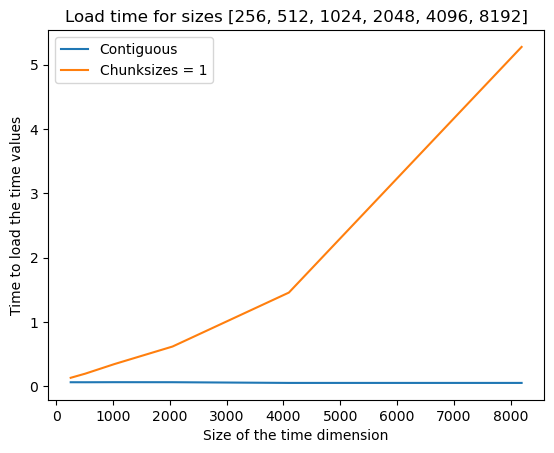

In [6]:
plt.plot(sizes, results[0::2], label="Contiguous")
plt.plot(sizes, results[1::2], label="Chunksizes = 1")
plt.legend()
plt.xlabel("Size of the time dimension")
plt.ylabel("Time to load the time values")
plt.title("Load time for sizes [256, 512, 1024, 2048, 4096, 8192]")